Visualization: Mapping Global Earthquake Activity
===
This project introduces the Basemap library, which can be used to create maps and plot geographical datasets.

[Home](http://nbviewer.ipython.org/urls/raw.github.com/ehmatthes/intro_programming/master/notebooks/index.ipynb)

Contents
---
- [Introduction](#Introduction)
- [Installing matplotlib and Basemap](#Installing-matplotlib-and-Basemap)
    - [Installing Basemap using Ubuntu’s standard packages](#Installing-Basemap-using-Ubuntu's-standard-packages)
    - [Installing from source](#Installing-from-source)
- [Making a simple map](#Making-a-simple-map)
    - [Adding detail](#Adding-detail)
    - [Zooming in](#Zooming-in)
- [Plotting points on a simple map](#Plotting-points-on-a-simple-map)
    - [Labeling points](#Labeling-points)
- [A global earthquake dataset](#A-global-earthquake-datase)
    - [Parsing the data](#Parsing-the-data)
    - [Plotting earthquakes](#Plotting-earthquakes)
    - [Adding color](#Adding-color)
    - [Adding a title](#Adding-a-title)
- [Other interesting datasets to explore](#Other-interesting-datasets-to-explore)
- [Conclusion](#Conclusion)

Introduction
---
The main goal of this project is to help you get comfortable making maps of geographical data.  If you follow along with the tutorial, you will end up making this map:

![Earthquakes of magnitude 1.0 or greater, for the last 7 days](/files/images/earthquake_plot_titled.png)

It takes fewer than 50 lines of code to generate this map from a raw dataset!  This project will conclude with a list of datasets to explore, to help you find a project of your own to try.

[top](#)

### Inline output

The following code helps make all of the code samples in this notebook display their output properly. If you are running these programs as standalone Python programs, you don't need to worry about this code.

If you are using IPython Notebook for this work, you need this cell in your notebook. Also note that you need to run this cell before running any other cell in the notebook. Otherwise your output will display in a separate window, or it won't display at all. If you try to run a cell and the output does not display in the notebook:

- Restart the IPython Notebook kernel.
- Run the following cell.
- Run the cell you were interested in again.

In [8]:
# This just lets the output of the following code samples
#  display inline on this page.
%matplotlib inline

Installing matplotlib and Basemap
===
These instructions are written for Ubuntu first, and instructions specific to other operating systems will be added shortly.

Python’s [matplotlib](http://matplotlib.org/) package is an amazing resource, and the [Basemap toolkit](http://matplotlib.org/basemap/) extends matplotlib’s capabilities to mapping applications.  Installing these packages is straightforward using Ubuntu’s package management system, but these packages may not work for all maps you want to produce.  In that case, it is good to know how to install each package from source.

Installing Basemap using Ubuntu’s standard packages
---
If you are running a newer version of Ubuntu, you may be able to get away with simply installing matplotlib and basemap through the standard repositories.  This approach should work well enough to get you started, but if you notice some odd behavior with your maps you might need to go back and install both packages from source.

    sudo apt-get install python-matplotlib
    sudo apt-get install python-mpltoolkits.basemap

If these ran successfully, you can move on to [Making a simple map](#simple_map).  If not, you might want to try installing matplotlib and basemap from source.

[top](#)

Installing from source
---

It is quite possible that the packages for your system are out of date, and you will need to install both matplot lib and Basemap from source. These are fairly large packages to download and install, so do this when you have a little time on your hands.

These instructions are adapted from the [matplotlib documentation](http://matplotlib.org/faq/installing_faq.html#how-to-install).

### Install matplotlib dependencies

We start by installing dependencies.  This is a 200-500MB download, depending on what you already have installed. When I did this most recently, it was a 220MB download, and it used 661MB of disk space after installation:

    sudo apt-get build-dep python-matplotlib

Matplotlib also depends on pyparsing. I install most of these non-system packages to my home directory, but you can also use a location such as `/usr/local`. I have read not to use `sudo` with `easy_install`, but I will admit having taken the easy way for some of these steps.

I test installation instructions for projects like this on a fresh version of Ubuntu in Virtualbox. The next time I try the whole process, I'm going to try using the `--install-dir` flag for `easy_install`: `easy_install --install-dir pyparsing`. If you are feeling adventurous, or if you understand these kinds of installations better than I do, feel free to install these packages where you wish. (If you know how to improve these instructions, please consider [contributing to the project](https://github.com/ehmatthes/intro_programming).)

    sudo easy_install pyparsing

### Install git

Now install git, if you have not done so already:

    sudo apt-get install git

### Download and install matplotlib

Now we need to clone the git repository for matplotlib.  You can do this in your home folder, or somewhere like /usr/local/ if that is where you normally install packages from source.  Once we have a local matplotlib repository, we need to run the install script:

    ~$ git clone git://github.com/matplotlib/matplotlib.git
    ~$ cd matplotlib
    ~$ sudo python setup.py install

If you want, you can test your installation of matplotlib. Open a text editor, and save the following file as simple_plot.py. Run the file using the command `python simple_plot.py --verbose-helpful`. You should see a simple linear plot. If you don't, the flag `--verbose-helpful` may give you some output that helps troubleshoot our installation process.

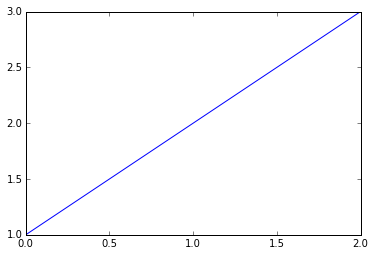

In [7]:
from pylab import *
plot([1,2,3])
show()

### Install Basemap from source
These installation instructions are adapted from the [Basemap documentation](http://matplotlib.org/basemap/users/installing.html). These may not be the best setup instructions; if you have any feedback, [please share it](https://github.com/ehmatthes/intro_programming/issues/34).

First you need to download the source code for Basemap, which is a matplotlib toolkit.  As of this writing, the newest version of Basemap is 1.0.7.  Look for the [newest version here](http://sourceforge.net/projects/matplotlib/files/matplotlib-toolkits/), and click the folder.  On the next page, look for a file called basemap-1.x.x.tar.gz.  This is the file you want to download. It is about 120MB, so again you will need a decent internet connection.

When the download is complete, open the archive and drag the basemap-1.x.x folder to your home folder, or /usr/local/, or wherever you keep your source code.

You first need to install geos. From the basemap-1.x.x directory, change into the geos directory and set the GEOS_DIR environment variable.  These directions assume you are working from your home directory; if you are working in /usr/local/, you will probably need to change the GEOS_DIR to /usr/local/:

    basemap-1.x.x $ cd geos-3.3.3
    basemap-1.x.x/geos-3.3.3 $ export GEOS_DIR=~/
    basemap-1.x.x/geos-3.3.3 $ ./configure --prefix=$GEOS_DIR
    basemap-1.x.x/geos-3.3.3 $ make
    basemap-1.x.x/geos-3.3.3 $ make install

Now you need to change back to the basemap parent directory, and install basemap:

    basemap-1.x.x/geos-3.3.3 $ cd ..
    basemap-1.x.x $ sudo python setup.py install

You can test if everything worked by running an example.  From your basemap-1.x.x directory, change into the examples directory and run simpletest.py.  Basemap is a large library, so the example script may take a while to run. You should see something like this:

![Basemap simpletest.py](/files/images/basemap_simpletest.png)

[top](#)

Making a simple map
---
Let's start out by trying to make a simple map of the world. If you run the following code, you should get a nice map of the globe, with good clean coastlines:

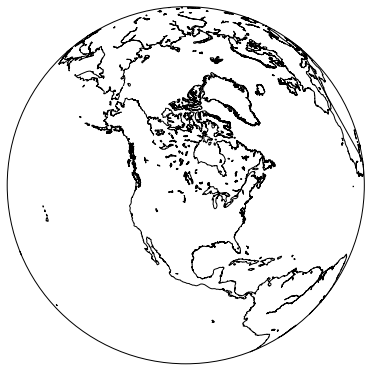

In [9]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
map = Basemap(projection='ortho', lat_0=50, lon_0=-100,
              resolution='l', area_thresh=1000.0)
 
map.drawcoastlines()
 
plt.show()

If you get a map that looks incomplete, such as the one below, you may want to try installing matplotlib and Basemap from source.

![Map drawn from outdated matplotlib Basemap](/files/images/globe_poor.png)

[top](#)

###Adding detail

Let’s add some more detail to this map, starting with country borders.  Add the following lines after `map.drawcoastlines()`:

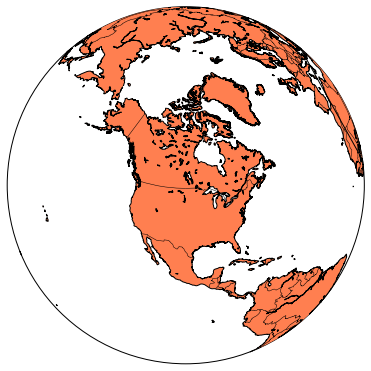

In [36]:
###highlight=[12,13]
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
map = Basemap(projection='ortho', lat_0=50, lon_0=-100,
              resolution='l', area_thresh=1000.0)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color='coral')
 
plt.show()

You should see the continents filled in.  If the entire globe is filled in, you may need to update your version of matplotlib, the basemap toolkit, or both.  That said, I watched one student follow this tutorial.  The entire globe ended up colored in, but on subsequent runs the colors came out right.  I’m pretty sure this is a glitch in either matplotlib or Basemap.  If you are having issues with this, you may want to go back and [install basemap from source](#install_source).

Let’s clean up the edge of the globe:

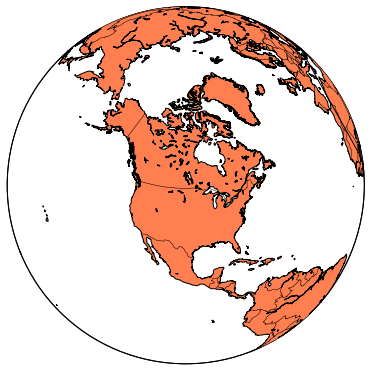

In [10]:
###highlight=[14]
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
map = Basemap(projection='ortho', lat_0=50, lon_0=-100,
              resolution='l', area_thresh=1000.0)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color='coral')
map.drawmapboundary()
 
plt.show()

You should see a cleaner circle outlining the globe. Now let’s draw latitude and longitude lines:

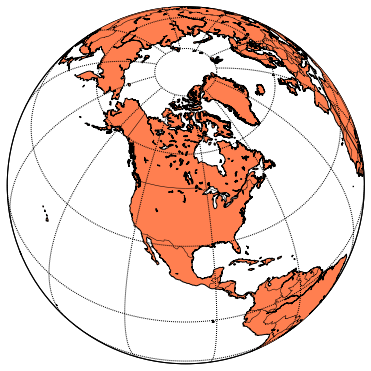

In [11]:
###highlight=[16,17]
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
map = Basemap(projection='ortho', lat_0=50, lon_0=-100,
              resolution='l', area_thresh=1000.0)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color='coral')
map.drawmapboundary()
 
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
 
plt.show()

The `np.arange()` arguments tell where your latitude and longitude lines should begin and end, and how far apart they should be spaced.

Let’s play with two of the map settings, and then we will move on to plotting data on this globe.  Let’s start by adjusting the perspective.  Change the latitude and longitude parameters in the original Basemap definition to 0 and -100. When you run the program, you should see your map centered along the equator:


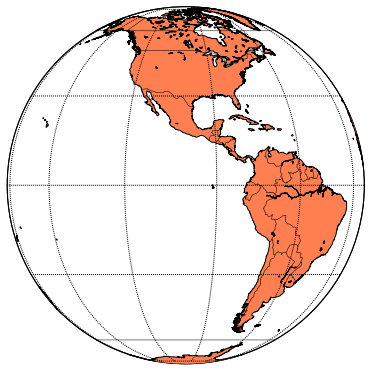

In [12]:
###highlight=[8,9]
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
map = Basemap(projection='ortho', lat_0=0, lon_0=-100,
              resolution='l', area_thresh=1000.0)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color='coral')
map.drawmapboundary()
 
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
 
plt.show()

Now let’s change the kind of map we are producing.  Change the projection type to ‘robin’. You should end up with a Robinson projection instead of a globe:


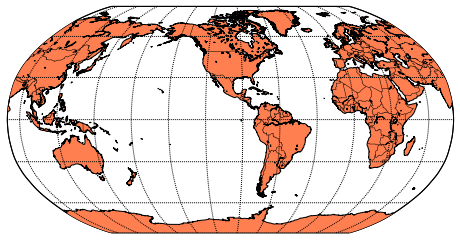

In [13]:
###highlight=[8]
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
map = Basemap(projection='robin', lat_0=0, lon_0=-100,
              resolution='l', area_thresh=1000.0)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color='coral')
map.drawmapboundary()
 
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
 
plt.show()

[top](#)

Zooming in
---
Before we move on to plotting points on the map, let’s see how to zoom in on a region.  This is good to know because there are many data sets specific to one region of the world, which would get lost when plotted on a map of the whole world.  Some projections can not be zoomed in at all, so if things are not working well, make sure to look at the [documentation](http://matplotlib.org/basemap/api/basemap_api.html).

I live on Baranof Island in southeast Alaska, so let’s zoom in on that region.  One way to zoom in is to specify the latitude and longitude of the lower left and upper right corners of the region you want to show.  Let’s use a mercator projection, which supports this method of zooming.  The notation for “lower left corner at 136.25 degrees west and 56 degrees north” is:

    llcrnrlon = -136.25, llcrnrlat = 56.0

So, the full set of parameters we will try is:

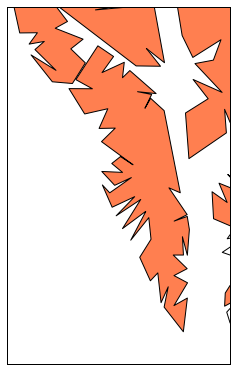

In [14]:
###highlight=[10,11]
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
map = Basemap(projection='merc', lat_0=57, lon_0=-135,
    resolution = 'l', area_thresh = 1000.0,
    llcrnrlon=-136.25, llcrnrlat=56,
    urcrnrlon=-134.25, urcrnrlat=57.75)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color='coral')
map.drawmapboundary()
 
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
 
plt.show()

Note that the center of the map, given by lat_0 and lon_0, must be within the region you are zoomed in on.

This worked, but the map is pretty ugly. We are missing an entire island to the west of here!  Let’s change the resolution to ‘h’ for ‘high’, and see what we get:

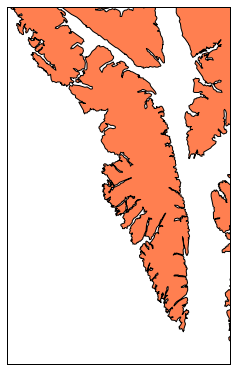

In [15]:
###highlight=[9]
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
map = Basemap(projection='merc', lat_0=57, lon_0=-135,
    resolution = 'h', area_thresh = 1000.0,
    llcrnrlon=-136.25, llcrnrlat=56,
    urcrnrlon=-134.25, urcrnrlat=57.75)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color='coral')
map.drawmapboundary()
 
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
 
plt.show()

This is much better, but we are still missing an entire island to the west.  This is because of the `area_thresh` setting.  This setting specifies how large a feature must be in order to appear on the map.  The current setting will only show features larger than 1000 square kilometers.  This is a reasonable setting for a low-resolution map of the world, but it is a really bad choice for a small-scale map.  Let’s change that setting to 0.1, and see how much detail we get:

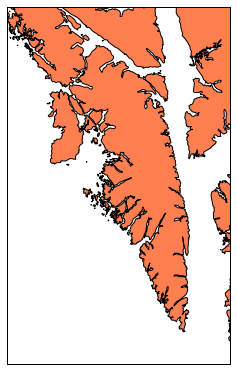

In [16]:
###highlight=[9]
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
map = Basemap(projection='merc', lat_0=57, lon_0=-135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-136.25, llcrnrlat=56,
    urcrnrlon=-134.25, urcrnrlat=57.75)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color='coral')
map.drawmapboundary()
 
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))

plt.show()

This is now a meaningful map.  We can see Kruzof island, the large island to the west of Baranof, and many other islands in the area.  Settings lower than `area_thresh=0.1` do not add any new details at this level of zoom.

Basemap is an incredibly flexible package.  If you are curious to play around with other settings, take a look at the [Basemap documentation](http://matplotlib.org/basemap/api/basemap_api.html).  Next, we will learn how to plot points on our maps.

[top](#)

Plotting points on a simple map
===
It is a testament to the hard work of many other people that we can create a map like the one above in less than 15 lines of code!  Now let’s add some points to this map.  I live in Sitka, the largest community on Baranof Island, so let’s add a point showing Sitka’s location.  Add the following lines just before plt.show():

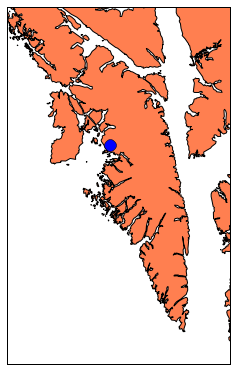

In [17]:
###highlight=[16,17,18,19]
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-136.25, llcrnrlat=56.0,
    urcrnrlon=-134.25, urcrnrlat=57.75)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()
 
lon = -135.3318
lat = 57.0799
x,y = map(lon, lat)
map.plot(x, y, 'bo', markersize=12)
 
plt.show()

The only non-obvious line here is the `bo` argument, which tells basemap to use a blue circle for the point.  There are quite a number of colors and symbols you can use.  For more choices, see the documentation for the [matplotlib.pyplot.plot](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.plot) function.  The default marker size is 6, but that was too small on this particular map.  A markersize of 12 shows up nicely on this map.

Plotting a single point is nice, but we often want to plot a large set of points on a map.  There are two other communities on Baranof Island, so let’s show where those two communities are on this map.  We store the latitudes and longitudes of our points in two separate lists, map those to x and y coordinates, and plot those points on the map.  With more dots on the map, we also want to reduce the marker size slightly:

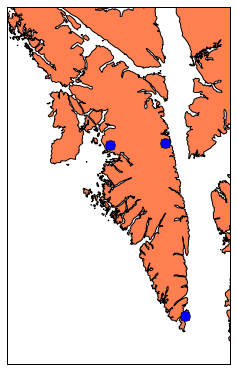

In [18]:
###highlight=[19]
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-136.25, llcrnrlat=56.0,
    urcrnrlon=-134.25, urcrnrlat=57.75)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()
 
lons = [-135.3318, -134.8331, -134.6572]
lats = [57.0799, 57.0894, 56.2399]
x,y = map(lons, lats)
map.plot(x, y, 'bo', markersize=10)
 
plt.show()

[top](#)

Labeling points
---
Now let’s label these three points.  We make a list of our labels, and loop through that list.  We need to include the x and y values for each point in this loop, so Basemap can figure out where to place each label.

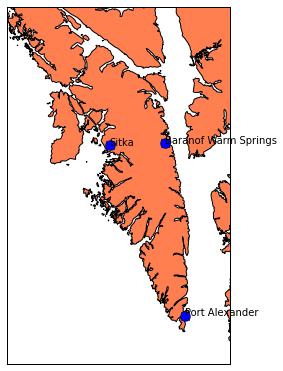

In [19]:
###highlight=[21,22,23]
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-136.25, llcrnrlat=56.0,
    urcrnrlon=-134.25, urcrnrlat=57.75)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()
 
lons = [-135.3318, -134.8331, -134.6572]
lats = [57.0799, 57.0894, 56.2399]
x,y = map(lons, lats)
map.plot(x, y, 'bo', markersize=10)
 
labels = ['Sitka', 'Baranof Warm Springs', 'Port Alexander']
for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt, ypt, label)
 
plt.show()

Our towns are now labeled, but the labels start right on top of our points. We can add offsets to these points, so they are not right on top of the points.  Let’s move all of the labels a little up and to the right.  (If you are curious, these offsets are in [map projection coordinates](http://matplotlib.org/basemap/users/mapcoords.html), which are measured in meters.  This means our code actually places the labels 10 km to the east and 5 km to the north of the actual townsites.)

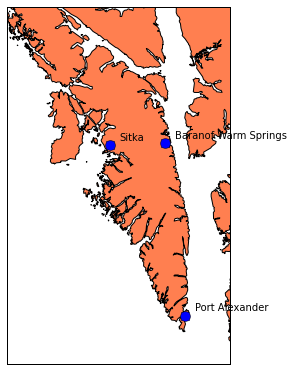

In [20]:
###highlight=[23]
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-136.25, llcrnrlat=56.0,
    urcrnrlon=-134.25, urcrnrlat=57.75)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()
 
lons = [-135.3318, -134.8331, -134.6572]
lats = [57.0799, 57.0894, 56.2399]
x,y = map(lons, lats)
map.plot(x, y, 'bo', markersize=10)
 
labels = ['Sitka', 'Baranof Warm Springs', 'Port Alexander']
for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt+10000, ypt+5000, label)
 
plt.show()

This is better, but on a map of this scale the same offset does not work well for all points.  We could plot each label individually, but it is easier to make two lists to store our offsets:

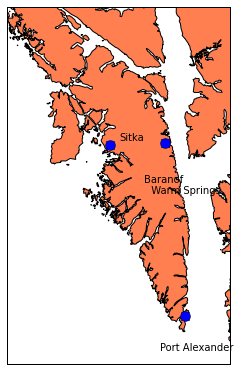

In [21]:
###highlight=[21,22,23,24,25,26]
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-136.25, llcrnrlat=56.0,
    urcrnrlon=-134.25, urcrnrlat=57.75)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()
 
lons = [-135.3318, -134.8331, -134.6572]
lats = [57.0799, 57.0894, 56.2399]
x,y = map(lons, lats)
map.plot(x, y, 'bo', markersize=10)
 
labels = ['Sitka', 'Baranof\n  Warm Springs', 'Port Alexander']
x_offsets = [10000, -20000, -25000]
y_offsets = [5000, -50000, -35000]

for label, xpt, ypt, x_offset, y_offset in zip(labels, x, y, x_offsets, y_offsets):
    plt.text(xpt+x_offset, ypt+y_offset, label)
 
plt.show()

There is no easy way to keep “Baranof Warm Springs” from crossing a border, but the use of newlines within a label makes it a little more legible. Now that we know how to add points to a map, we can move on to larger data sets.

[top](#)

A global earthquake dataset
===
The US government maintains a set of [live feeds](http://earthquake.usgs.gov/earthquakes/feed/v1.0/) of earthquake-related data from recent seismic events. You can choose to examine data from the last hour, through the last thirty days. You can choose to examine data from events that have a variety of magnitudes. For this project, we will use a dataset that contains all seismic events over the last seven days, which have a magnitude of 1.0 or greater.

You can also choose from a variety of formats. In this first example, we will look at how to parse a file in the csv format (comma-separated value). There are more convenient formats to work with such as json, but not all data sets are neatly organized. We will start out parsing a csv file, and then perhaps take a look at how to work with the json format.

To follow this project on your own system, go to the [USGS source](http://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php) for csv files of earthquake data and download the file "M1.0+ Earthquakes" under the "Past 7 Days" header. If you like, here is a [direct link](http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_week.csv) to that file. This data is updated every 5 minutes, so your data will not match what you see here exactly. The format should match, but the data itself will not match.

Parsing the data
---
If we examine the first few lines of the text file of the dataset, we can identify the information that is most relevant to us:

    time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
    2013-11-26T14:23:17.591Z,37.3264,-117.1416,0,1.57,ml,20,126.08,0.357,,nn,nn00429911,2013-11-26T14:26:09.000Z,"43km S of Goldfield, Nevada",earthquake
    2013-11-26T14:13:02.200Z,35.2367,-118.073,1.8,1.5,Ml,22,50.4,0.18864621,0.17,ci,ci11395442,2013-11-26T14:15:34.932Z,"14km NNW of California City, California",earthquake
    2013-11-26T14:05:14.000Z,62.9207,-146.6713,20.4,1.9,Ml,,,,0.56,ak,ak10876636,2013-11-26T14:14:35.763Z,"107km NNW of Glennallen, Alaska",earthquake
    2013-11-26T14:03:22.958Z,39.6067,-119.435,10.4971,1.35,ml,25,97.85,0.111,0.1773,nn,nn00429909,2013-11-26T14:33:12.000Z,"15km W of Fernley, Nevada",earthquake
    2013-11-26T13:38:33.100Z,33.4845,-116.4818,14.2,1.2,Ml,18,97.2,0.08084838,0.13,ci,ci11395434,2013-11-26T13:40:44.740Z,"19km ESE of Anza, California",earthquake

Data is often stored in the csv format because it is fairly easy for us to process.  We process the file by reading each line of the file into our program, splitting each line at the commas, and storing the data we care about in our program.

For now, we are only interested in the latitude and longitude of each earthquake.  If we look at the first line, it looks like we are interested in the second and third columns of each line.  In the directory where you save your program files, make a directory called “datasets”.  Save the text file as “earthquake_data.csv” in this new directory.  Now let’s load the file into our program, read the first two lines, and split the values at the commas:

In [3]:
data_file = open('datasets/earthquake_data.csv')
 
for index, line in enumerate(data_file.readlines()):
    print(line.split(','))
    if index == 1:
        break

['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type\n']
['2013-11-26T14:23:17.591Z', '37.3264', '-117.1416', '0', '1.57', 'ml', '20', '126.08', '0.357', '', 'nn', 'nn00429911', '2013-11-26T14:26:09.000Z', '"43km S of Goldfield', ' Nevada"', 'earthquake\n']


When you parse a csv file, it is worthwhile to check that you are getting the number of columns you expect to get. Reading the first line of the csv file, we can count 15 separate fields. Sometimes commas in the data will create more than 15 fields when you split the data on commas. Rather than counting things manually, let's modify our program slightly to report on the number of fields for us. Let's count the fields in the first 5 lines of data:

In [6]:
# Open the earthquake data file.
data_file = open('datasets/earthquake_data.csv')

# Read each line in the file, and keep track of what line we are on.
for index, line in enumerate(data_file.readlines()):
    # Split the data into items in a list.
    split_line = line.split(',')
    
    # Count the number of fields in each line.
    number_fields = len(split_line)
    print(number_fields, split_line)
    
    # Stop after the 5th line of data.
    if index == 5:
        break

15 ['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type\n']
16 ['2013-11-26T14:23:17.591Z', '37.3264', '-117.1416', '0', '1.57', 'ml', '20', '126.08', '0.357', '', 'nn', 'nn00429911', '2013-11-26T14:26:09.000Z', '"43km S of Goldfield', ' Nevada"', 'earthquake\n']
16 ['2013-11-26T14:13:02.200Z', '35.2367', '-118.073', '1.8', '1.5', 'Ml', '22', '50.4', '0.18864621', '0.17', 'ci', 'ci11395442', '2013-11-26T14:15:34.932Z', '"14km NNW of California City', ' California"', 'earthquake\n']
16 ['2013-11-26T14:05:14.000Z', '62.9207', '-146.6713', '20.4', '1.9', 'Ml', '', '', '', '0.56', 'ak', 'ak10876636', '2013-11-26T14:14:35.763Z', '"107km NNW of Glennallen', ' Alaska"', 'earthquake\n']
16 ['2013-11-26T14:03:22.958Z', '39.6067', '-119.435', '10.4971', '1.35', 'ml', '25', '97.85', '0.111', '0.1773', 'nn', 'nn00429909', '2013-11-26T14:33:12.000Z', '"15km W of Fernley', ' Nevada"', 'earthquake\n']
16 ['2013-11-26T13:38:33

This was a really good check to perform. We see 15 fields in the header line, as we expect, but Python is finding 16 fields in each line of data. There must be a comma somewhere in one of the fields. It's probably in one of the text fields, and a quick scan through the fields shows that the field "place" is being split into two parts. For example, in the first line of data the place is

    "43km S of Goldfield, Nevada"

This gets split into 

    [..., '"43 km S of Goldfield', ' Nevada"', ...] 

We won't split the file any differently, we will just be aware of this as we identify the index of each field we want to use from this data.

This data is actually pretty easy to work with, because the data we are interested in is in the second and third fields. We want to pull out just the latitude and longitude for each earthquake. Here is the code to read through the entire file, and store just the latitude and longitude into two separate lists:

In [20]:
# Open the earthquake data file.
data_file = open('datasets/earthquake_data.csv')

# Create empty lists for the latitudes and longitudes.
lats, lons = [], []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
for index, line in enumerate(data_file.readlines()):
    if index > 0:
        lats.append(float(line.split(',')[1]))
        lons.append(float(line.split(',')[2]))

# Display the first 5 lats and lons.
print('lats', lats[0:5])
print('lons', lons[0:5])

lats [37.3264, 35.2367, 62.9207, 39.6067, 33.4845]
lons [-117.1416, -118.073, -146.6713, -119.435, -116.4818]


We take the second and third items in each line, and turn them into decimal floats.  Then we add these numbers to our list of latitudes and longitudes.  If you have not seen the enumerate function before, it gives you access to the index of the for loop.  We use this to make sure we are not reading in the first line of the file, which contains the text labels for each column.

[top](#)

Using Python's csv module to parse the data
---
I wanted to show how to manually parse a csv file, because I want you to think about how to process files manually. Once you are aware of how to do that, it is good to know about dedicated tools for this kind of work. Python has a [csv module](http://docs.python.org/3.3/library/csv.html) that automates some of the work we just did.

The following code produces the same two lists of latitudes and longitudes, but it does so a little more cleanly:

In [23]:
import csv

# Open the earthquake data file.
filename = 'datasets/earthquake_data.csv'

# Create empty lists for the latitudes and longitudes.
lats, lons = [], []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[1]))
        lons.append(float(row[2]))
        
# Display the first 5 lats and lons.
print('lats', lats[0:5])
print('lons', lons[0:5])

lats [37.3264, 35.2367, 62.9207, 39.6067, 33.4845]
lons [-117.1416, -118.073, -146.6713, -119.435, -116.4818]


This looks pretty similar to the manual approach, but it is a little more efficient. The `with` statement ensures that the file closes properly once it has been read, even if there are errors in processing the file. With the file open, a csv reader object is initialized. The next function skips over the header row. Then we loop through each row in the data file, and pull out the information we want. You might notice that we don’t have to worry about any string slicing; the csv module figures out which commas are used to separate fields, and which are used in string fields such as the place fields.

If you are just playing around with visualization, you may stick with the manual approach to parsing your csv files. But if you want to get better at visualizations, it is worth your while to become familiar with the csv module. For example, it is possible to use the csv module to read data directly into a dictionary. In this approach, you could read in the first line to determine the keys for your dictionary, and store the values directly in the dictionary.

[top](#)

Plotting earthquakes
---
Using what we learned about plotting a set of points, we can now make a simple plot of these points:

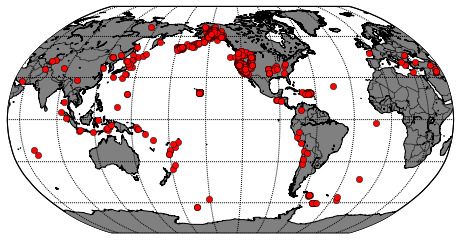

In [22]:
import csv

# Open the earthquake data file.
filename = 'datasets/earthquake_data.csv'

# Create empty lists for the latitudes and longitudes.
lats, lons = [], []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[1]))
        lons.append(float(row[2]))
 
# --- Build Map ---
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'gray')
map.drawmapboundary()
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
 
x,y = map(lons, lats)
map.plot(x, y, 'ro', markersize=6)
 
plt.show()

This is pretty cool; in about 40 lines of code we have turned a giant text file into a very informative map.  But there is one fairly obvious improvement we should make.  Let’s try to make the points on the map represent the magnitude of each earthquake.  We start out by reading the magnitudes into a list along with the latitudes and longitudes of each earthquake:

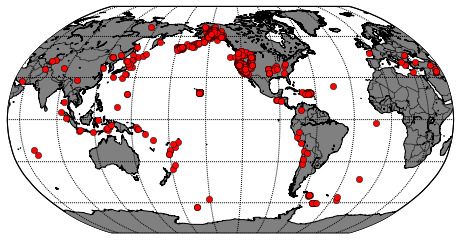

In [23]:
###highlight=[9,24]
import csv

# Open the earthquake data file.
filename = 'datasets/earthquake_data.csv'

# Create empty lists for the data we are interested in.
lats, lons = [], []
magnitudes = []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[1]))
        lons.append(float(row[2]))
        magnitudes.append(float(row[4]))
 
# --- Build Map ---
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'gray')
map.drawmapboundary()
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
 
x,y = map(lons, lats)
map.plot(x, y, 'ro', markersize=6)
 
plt.show()

Now instead of plotting all of the points at once, we will loop through the points and plot them one at a time.  When we plot each point, we will adjust the dot size according to the magnitude.  Since the magnitudes start at 1.0, we can simply use the magnitude as a scale factor.  To get the marker size, we just multiply the magnitude by the smallest dot we want on our map:

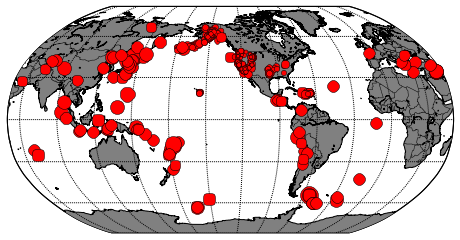

In [24]:
###highlight=[40,41,42,43,44]
import csv

# Open the earthquake data file.
filename = 'datasets/earthquake_data.csv'

# Create empty lists for the data we are interested in.
lats, lons = [], []
magnitudes = []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[1]))
        lons.append(float(row[2]))
        magnitudes.append(float(row[4]))
        
# --- Build Map ---
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'gray')
map.drawmapboundary()
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
 
min_marker_size = 2.5
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = map(lon, lat)
    msize = mag * min_marker_size
    map.plot(x, y, 'ro', markersize=msize)
 
plt.show()

We define our minimum marker size and then loop through all the data points, calculating the marker size for each point by multiplying the magnitude of the earthquake by the minimum marker size we have set.

If you have not used the zip function before, it takes a number of lists, and pulls the one item from each list.  On each loop iteration, we have a matching set of longitude, latitude, and magnitude of each earthquake.

[top](#)

Adding color
---
There is one more change we can make, to generate a more meaningful visualization.  Let’s use some different colors to represent the magnitudes as well.  Let's make small earthquakes green, moderate earthquakes yellow, and significant earthquakes red.  The following version includes a function that identifies the appropriate color for each earthquake:

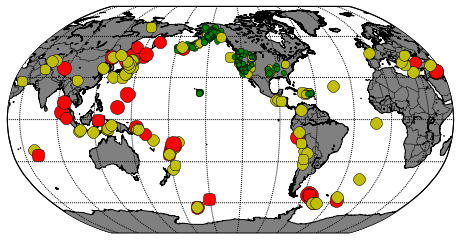

In [25]:
###highlight=[31,32,33,34,35,36,37,38,39,54,55]
import csv

# Open the earthquake data file.
filename = 'datasets/earthquake_data.csv'

# Create empty lists for the data we are interested in.
lats, lons = [], []
magnitudes = []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[1]))
        lons.append(float(row[2]))
        magnitudes.append(float(row[4]))
        
# --- Build Map ---
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 5.0:
        return ('yo')
    else:
        return ('ro')
 
map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'gray')
map.drawmapboundary()
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
 
min_marker_size = 2.5
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = map(lon, lat)
    msize = mag * min_marker_size
    marker_string = get_marker_color(mag)
    map.plot(x, y, marker_string, markersize=msize)
 
plt.show()

We can easily see where the most significant earthquakes are happening.

[top](#)

Adding a title
---
Before we finish, let’s add a title to our map.  Our title needs to include the date range for these earthquakes, which requires us to pull in a little more data  when we parse the raw text. To make our title, we will use the dates of the first and last earthquake.  Since the file includes the most recent earthquakes first, we need to use the last items as the starting date:

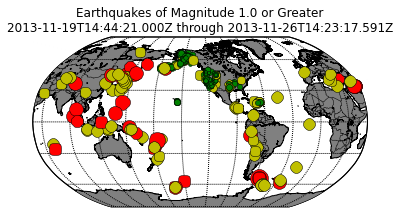

In [9]:
###highlight=[10,26,59,60,61]
import csv

# Open the earthquake data file.
filename = 'datasets/earthquake_data.csv'

# Create empty lists for the data we are interested in.
lats, lons = [], []
magnitudes = []
timestrings = []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[1]))
        lons.append(float(row[2]))
        magnitudes.append(float(row[4]))
        timestrings.append(row[0])
        
# --- Build Map ---
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 5.0:
        return ('yo')
    else:
        return ('ro')
 
map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'gray')
map.drawmapboundary()
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
 
min_marker_size = 2.5
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = map(lon, lat)
    msize = mag * min_marker_size
    marker_string = get_marker_color(mag)
    map.plot(x, y, marker_string, markersize=msize)
    
title_string = "Earthquakes of Magnitude 1.0 or Greater\n"
title_string += "%s through %s" % (timestrings[-1], timestrings[0])
plt.title(title_string)
 
plt.show()

This is good, but the time zone format makes the title a little harder to read. Let's just use the dates, and ignore the times in our title. We can do this by keeping the first 10 characters of each `timestring`, using a slice: `timestring[:10]`. Since this is the final iteration for this project, let's also make the plot size larger as well:

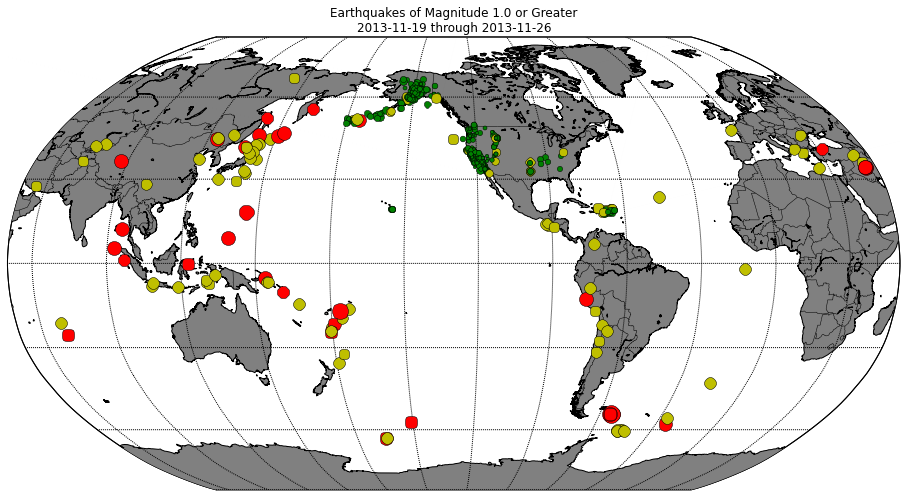

In [16]:
###highlight=[43,44,63]
import csv

# Open the earthquake data file.
filename = 'datasets/earthquake_data.csv'

# Create empty lists for the data we are interested in.
lats, lons = [], []
magnitudes = []
timestrings = []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[1]))
        lons.append(float(row[2]))
        magnitudes.append(float(row[4]))
        timestrings.append(row[0])
        
# --- Build Map ---
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 5.0:
        return ('yo')
    else:
        return ('ro')

# Make this plot larger.
plt.figure(figsize=(16,12))

map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'gray')
map.drawmapboundary()
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
 
min_marker_size = 2.5
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = map(lon, lat)
    msize = mag * min_marker_size
    marker_string = get_marker_color(mag)
    map.plot(x, y, marker_string, markersize=msize)
    
title_string = "Earthquakes of Magnitude 1.0 or Greater\n"
title_string += "%s through %s" % (timestrings[-1][:10], timestrings[0][:10])
plt.title(title_string)

plt.show()

To get a sense of how flexible the basemap library is, check out how quickly you can change the look and feel of this map.  Comment out the line that colors the continents, and replace it with a call to bluemarble. You might want to adjust `min_marker_size` as well, if you make this map on your own machine:

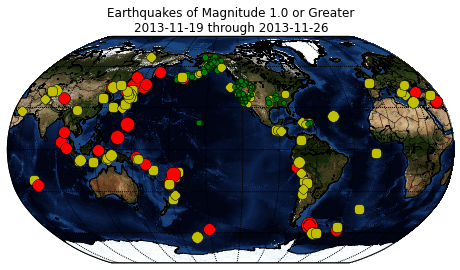

In [28]:
###highlight=[47,48,53]
import csv

# Open the earthquake data file.
filename = 'datasets/earthquake_data.csv'

# Create empty lists for the data we are interested in.
lats, lons = [], []
magnitudes = []
timestrings = []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[1]))
        lons.append(float(row[2]))
        magnitudes.append(float(row[4]))
        timestrings.append(row[0])
        
# --- Build Map ---
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 5.0:
        return ('yo')
    else:
        return ('ro')
 
map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
map.drawcoastlines()
map.drawcountries()
#map.fillcontinents(color = 'gray')
map.bluemarble()
map.drawmapboundary()
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
 
min_marker_size = 2.25
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = map(lon, lat)
    msize = mag * min_marker_size
    marker_string = get_marker_color(mag)
    map.plot(x, y, marker_string, markersize=msize)
    
title_string = "Earthquakes of Magnitude 1.0 or Greater\n"
title_string += "%s through %s" % (timestrings[-1][:10], timestrings[0][:10])
plt.title(title_string)
 
plt.show()

We could continue to refine this map.  For example, we could read the data from the url instead of from a downloaded text file.  That way the map would always be current.  We could determine each dot’s color on a continuous scale of greens, yellows, and reds.  Now that you have a better sense of how to work with basemap, I hope you enjoy playing with these further refinements as you map the datasets you are most interested in.

[top](#)

Other interesting datasets to explore
===
In this project, you learned how to make a simple map and plot points on that map.  You learned how to pull those points from a large dataset.  Now that you have a basic understanding of this process, the next step is to try your hand at plotting some data of your own.  You might start by exploring some of the following datasets.

###Global Population data

This dataset ties global census data to latitude and longitude grids.

[http://daac.ornl.gov/ISLSCP_II/guides/global_population_xdeg.html](http://daac.ornl.gov/ISLSCP_II/guides/global_population_xdeg.html)

###Climate Data library

This includes over 300 data files, from a variety of fields related to earth science and climatology.

[http://iridl.ldeo.columbia.edu/](http://iridl.ldeo.columbia.edu/)

###IBM Many Eyes

This is an interesting project that allows people to upload their own datasets, which become available to the public.  You can add your visualizations of these datasets to the existing gallery.

[http://www-958.ibm.com/software/data/cognos/manyeyes/datasets/pakistan-school/versions/1](http://www-958.ibm.com/software/data/cognos/manyeyes/datasets/pakistan-school/versions/1)

###USGov Raw Data

This is another large set of datasets, about a variety of topics.  This is where I found the data for the earthquake visualization featured in the tutorial.

[https://explore.data.gov/catalog/raw/](https://explore.data.gov/catalog/raw/)

###Hilary Mason’s Research-Quality Datasets

Hilary Mason is a data scientist at bitly.  If you have never heard of her, it is well worth your time to take a look at [her site](http://www.hilarymason.com/).  If you are new to data science, you might want to start with here post [Getting Started with Data Science](http://www.hilarymason.com/blog/getting-started-with-data-science/).  She has a curated collection of interesting datasets here:

[http://bitly.com/bundles/hmason/1](http://bitly.com/bundles/hmason/1)

###DEA Meth Lab database

This would be a little harder to work with, because the locations are given as addresses instead of by latitude and longitude.  It is also released in pdf format, which might be more challenging to work with.  But this is a pretty compelling topic, and it would be interesting to map out meth-related arrests and incidents of violent crime over different periods of time.

[http://www.justice.gov/dea/clan-lab/clan-lab.shtml](http://www.justice.gov/dea/clan-lab/clan-lab.shtml)

Other
---

####Smart Disclosure Data:

[http://www.data.gov/consumer/page/consumer-data-page](http://www.data.gov/consumer/page/consumer-data-page)

####100+ Interesting Data Sets for Statistics:

[http://rs.io/2014/05/29/list-of-data-sets.html](http://rs.io/2014/05/29/list-of-data-sets.html)

[HN Discussion with links to more data sets](https://news.ycombinator.com/item?id=7818003)

Conclusion
===

That’s it for this project.  If you have another geospatial dataset to suggest, or if you create something interesting, please feel free to [share it](http://github.com/ehmatthes/intro_programming).

### Notes:
- Someone at Lafayette college did their [own take on this project](http://sites.lafayette.edu/itsblog/2013/09/27/plotting-your-own-course-with-basemap/). Their code pulls a live update of the earthquake data, and their plot has an interesting day/ night visualization as well.

[top](#)

- - -
[Home](http://nbviewer.ipython.org/urls/raw.github.com/ehmatthes/intro_programming/master/notebooks/index.ipynb)